In [49]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt

In [22]:
# read dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [23]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [24]:
# Concatenate the dataframes
X=pd.concat([X,geography,gender],axis=1)

In [25]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 11) (3000, 11) (7000,) (3000,)


In [30]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

2024-02-05 21:28:41.252026: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [40]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
model = classifier.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6487 - accuracy: 0.6287 - val_loss: 0.5827 - val_accuracy: 0.7003
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7523 - val_loss: 0.5363 - val_accuracy: 0.7757
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7969 - val_loss: 0.5170 - val_accuracy: 0.7943
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.7980 - val_loss: 0.5043 - val_accuracy: 0.7930
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7976 - val_loss: 0.4946 - val_accuracy: 0.7930
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7974 - val_loss: 0.4865 - val_accuracy: 0.7930
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7983 - val_loss: 0.4793 - val_accuracy: 0.7927

Epoch 58/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8623 - val_loss: 0.3610 - val_accuracy: 0.8533
Epoch 59/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8631 - val_loss: 0.3610 - val_accuracy: 0.8533
Epoch 60/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8633 - val_loss: 0.3606 - val_accuracy: 0.8520
Epoch 61/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8626 - val_loss: 0.3607 - val_accuracy: 0.8530
Epoch 62/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8629 - val_loss: 0.3605 - val_accuracy: 0.8527
Epoch 63/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8626 - val_loss: 0.3603 - val_accuracy: 0.8527
Epoch 64/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8626 - val_loss: 0.3601 - val_accuracy:

In [45]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


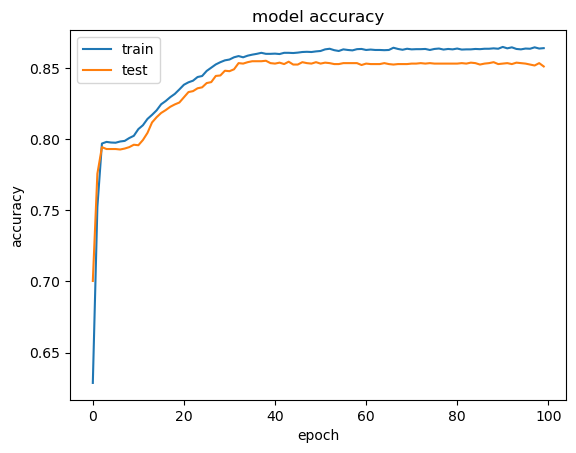

In [52]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

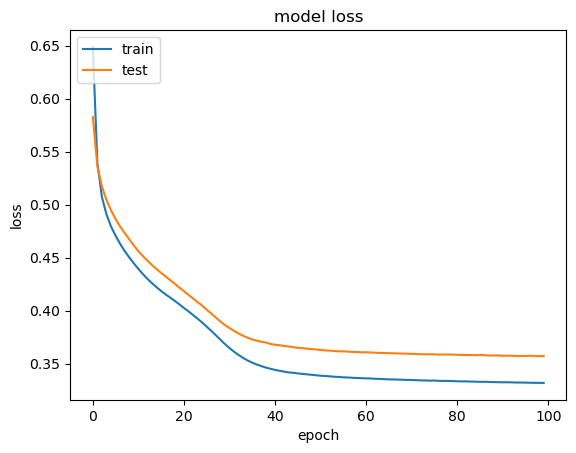

In [53]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
# Prediction
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

94/94 [==============================] - 0s 1ms/step


In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [57]:
cm

array([[2281,   99],
       [ 348,  272]])

In [58]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [61]:
print(f"Model accuracy is {score * 100}%")

Model accuracy is 85.1%
